In [24]:
import os
os.listdir()
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = pd.read_csv("zomato.csv")
df.head()

Saving zomato.csv to zomato.csv


,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [25]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


(7105, 12)

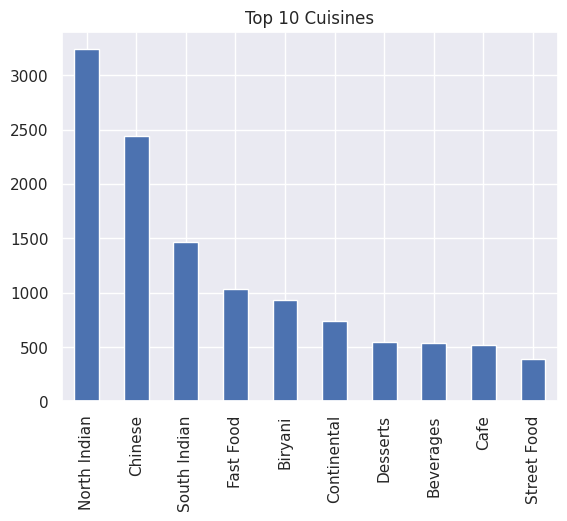

In [26]:
df['cuisines type'] = df['cuisines type'].str.split(', ')

 #flattening
from itertools import chain
all_cuisines = list(chain.from_iterable(df['cuisines type'].dropna()))

pd.Series(all_cuisines).value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cuisines")
plt.show()

  INSIGHTS: NORTH INDIAN FOOD IS ORDERED HIGHEST

In [27]:
max_ratings = df['num of ratings'].max()
df[df['num of ratings'] == max_ratings][['restaurant name', 'num of ratings']]

,restaurant name,num of ratings
1035,Byg Brewski Brewing Company,16345


INSIGHT: THIS REATAURANT HAS THE MAXIMUM VOTES SHOWING HIGH POPULARITY.

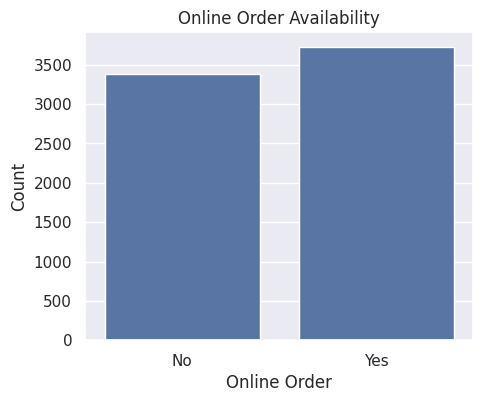

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['online_order'])
plt.title("Online Order Availability")
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show()


INSIGHT: MOST RESTAURANT PROVIDE ONLINE ODERING

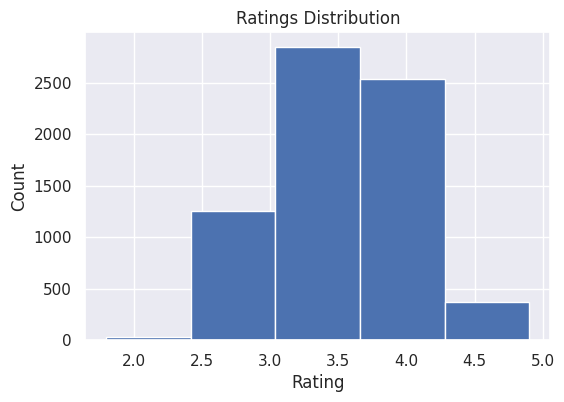

In [29]:
plt.figure(figsize=(6,4))
plt.hist(df['rate (out of 5)'], bins=5)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

INSIGHTS : MOST RESTAURANT HAVE RATING BETWEEN 3.0 TO 3.5

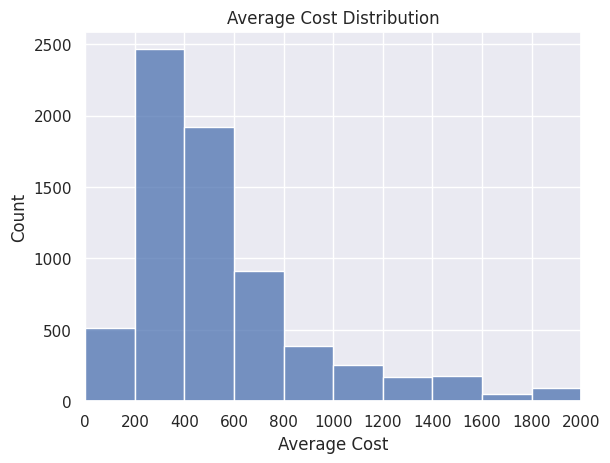

In [30]:
bins = [0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
sns.histplot(df['avg cost (two people)'], bins=bins)
plt.xticks(bins)
plt.title("Average Cost Distribution")
plt.xlabel("Average Cost")
plt.ylabel("Count")
plt.xlim(0, 2000)
plt.show()

INSIGHT : MOST  COUPLE  PREFER  COSTING  AROUND  RS.200  TO  RS.400  FOR  2  PEOPLE

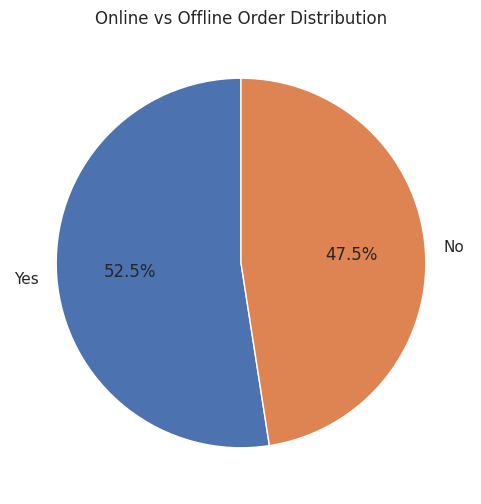

In [31]:
order_counts = df['online_order'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    order_counts,
    labels=order_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Online vs Offline Order Distribution")
plt.show()


INSIGHTS : ONLINE ORDERS ARE POPULAR

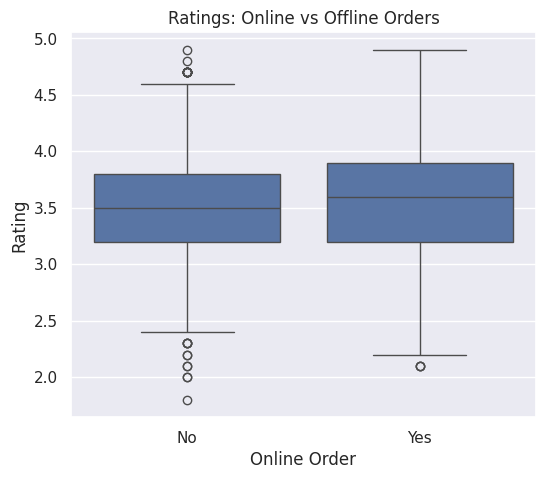

In [32]:
plt.figure(figsize=(6,5))
sns.boxplot(x='online_order', y='rate (out of 5)', data=df)
plt.title("Ratings: Online vs Offline Orders")
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.show()

INSIGHTS : RESTAURANT OFFERING ONLINE ORDERS RECIEVE BETTER RATINGS

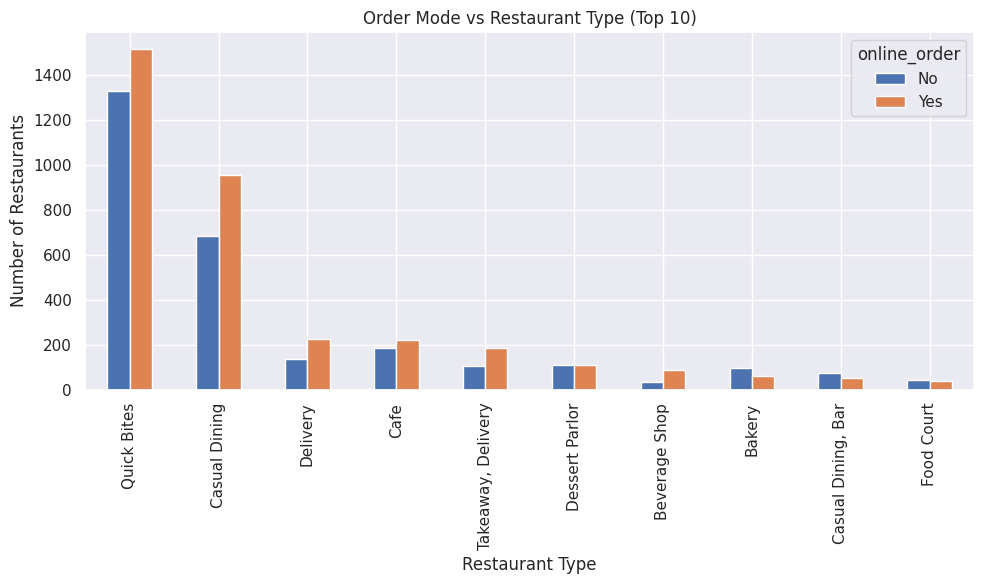

In [33]:
order_vs_type = pd.crosstab(df['restaurant type'], df['online_order'])
order_vs_type_sorted = order_vs_type.sort_values(by='Yes', ascending=False).head(10)
order_vs_type_sorted.plot(
    kind='bar',
    figsize=(10, 6)
)
plt.title('Order Mode vs Restaurant Type (Top 10)')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


INSIGHTS :
Quick service and delivery-oriented restaurants rely heavily on online orders, while dine-in-oriented restaurants exhibit more balanced or offline ordering behavior.

Quick Bites are the most common restaurant type listed on Zomato